# 1. Problem Definition

> To predict whether a passenger survives the historic Titanic Shipwreck.

# 2. Data

The data for the machine learning project is obtained from Kaggle practice tournaments.
The total data is divided into train and test data. 

**Training set (train.csv)**- The training set is used to build the machine learning models. Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.


**Test set (test.csv)**- The test set is used to see how well your model performs on unseen data. For the test set, the ground truth for each passenger is not provided.

# 3. Evaluation

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

# 4. Features

**survival**- Survival(0 = No, 1 = Yes) 
**pclass**-	Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd) 
**sex**-	Sex	
**Age**-	Age in years	
**sibsp**-	# of siblings / spouses aboard the Titanic	
**parch**-	# of parents / children aboard the Titanic	
**ticket**-	Ticket number	
**fare**-	Passenger fare	
**cabin**-	Cabin number	
**embarked**-	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


**Variable Notes**

>pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



In [2]:
# Importing the required tools

# Regular exploratory data analysis (EDA) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

In [3]:
df_train = pd.read_csv("C:data/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking missing values
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_train.isna().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [6]:
# Missing value details
total = df_train.isna().sum().sort_values(ascending=False)
percent = round((df_train.isna().sum()/df_train.isna().count())*100, 2)
missing_values = pd.DataFrame({"Total": total, "%": percent})
missing_values

,Total,%
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22
Fare,0,0.00
Name,0,0.00
Parch,0,0.00
PassengerId,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis (EDA)

The goal is to create more information and idea about the data we are working with. As per preliminary analysis, every parameter except **Passenger id, Name** and **Ticket** have impact on the survival rate. Lets analyse

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


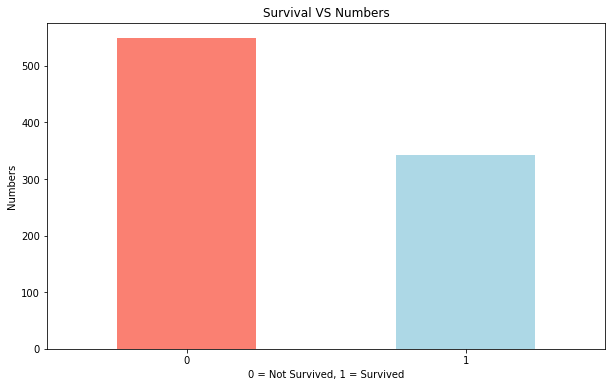

In [10]:
df_train["Survived"].value_counts().plot(kind = "bar",
                                         figsize = (10, 6),
                                         color = ["salmon", "lightblue"])
plt.title("Survival VS Numbers")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Numbers")
plt.xticks(rotation = 0);

In [11]:
pd.crosstab(df_train.Pclass, df_train.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


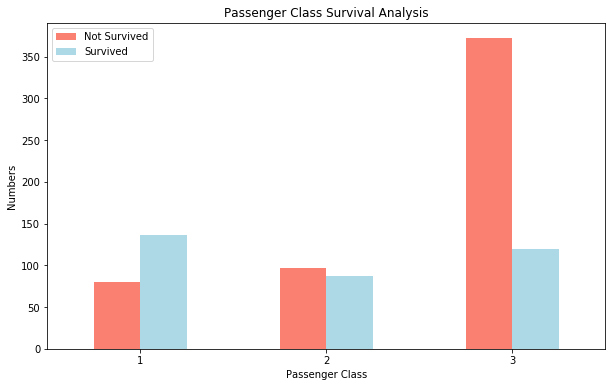

In [12]:
pd.crosstab(df_train.Pclass, df_train.Survived).plot(kind = "bar",
                                                     figsize = (10,6),
                                                     color = ["salmon", "lightblue"])
plt.title("Passenger Class Survival Analysis")
plt.xlabel("Passenger Class")
plt.ylabel("Numbers")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation = 0);

In [13]:
pd.crosstab(df_train.Survived, df_train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


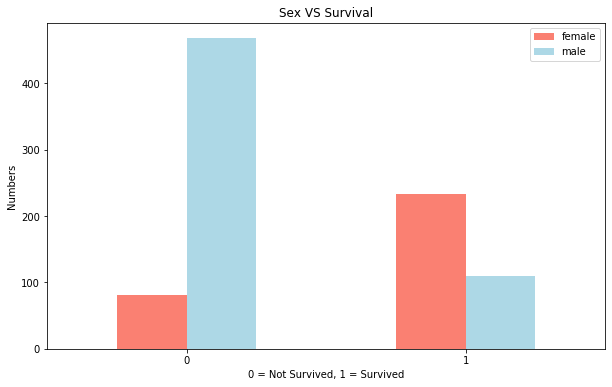

In [14]:
pd.crosstab(df_train.Survived, df_train.Sex).plot(kind = "bar",
                                                  figsize = (10, 6),
                                                  color = ["salmon", "lightblue"]);
plt.title("Sex VS Survival")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Numbers")
plt.legend()
plt.xticks(rotation = 0);

In [15]:
women = df_train[df_train["Sex"] == "female"]
women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
men = df_train[df_train["Sex"] == "male"]
men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [17]:
men = men.dropna(subset = ["Age"])
men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [18]:
men.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          358
Embarked         0
dtype: int64

In [19]:
women = women.dropna(subset = ["Age"])
women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
women.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          171
Embarked         2
dtype: int64

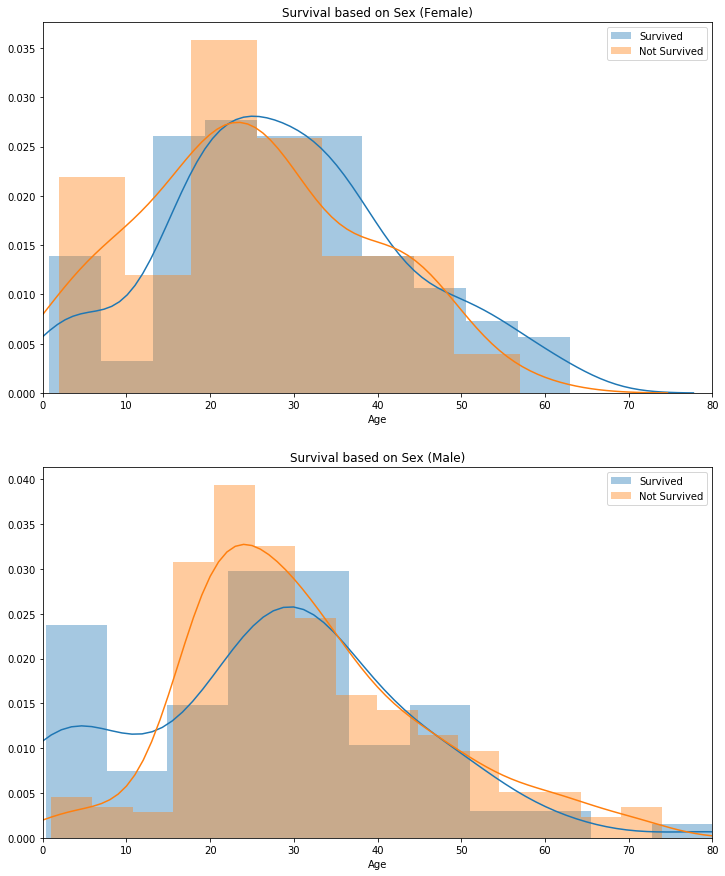

In [21]:
fig, (ax0,ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (12, 15),)
ax0 = sns.distplot(women.Age[women.Survived == 1],
                   ax = ax0,
                   label = ["Survived"])
ax0 = sns.distplot(women.Age[women.Survived == 0],
                   ax = ax0,
                   label = ["Not Survived"])
ax0.set(title = "Survival based on Sex (Female)")
ax0.set_xlim([0,80])
ax0.legend()

ax1 = sns.distplot(men.Age[men.Survived == 1],
                   ax = ax1,
                   label = ["Survived"])
ax1 = sns.distplot(men.Age[men.Survived == 0],
                   ax = ax1,
                   label = ["Not Survived"])
ax1.set(title = "Survival based on Sex (Male)")
ax1.set_xlim([0,80])
ax1.legend();

In [22]:
pd.crosstab(df_train["Survived"], df_train["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


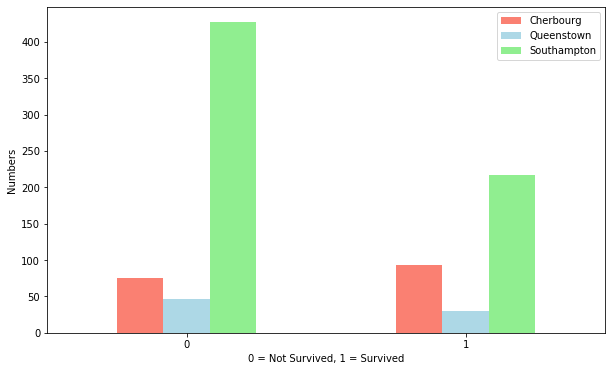

In [23]:
pd.crosstab(df_train["Survived"], df_train["Embarked"]).plot(kind = "bar",
                                                             figsize = (10, 6),
                                                             color = ["salmon", "lightblue", "lightgreen"])
plt.legend(["Cherbourg", "Queenstown", "Southampton"])
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Numbers")
plt.xticks(rotation = 0);

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
def cabin_type(df):
    
    df["Cabin_type"] = df["Cabin"].str.extract('([A-Z]+)')
    df.drop("Cabin", axis = 1, inplace = True)
    return df

cabin_type(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


The alphabets in the Cabin column denotes the type of cabin or category of cabins. So we try to get any additional information by splitting the alphabet part from the cabin column. We make another column **Cabin_type** which denotes the cabin category for a particular ticket.

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN


In [27]:
df_train["Cabin_type"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_type, dtype: int64

In [28]:
pd.crosstab(df_train.Survived, df_train.Cabin_type)

Cabin_type,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8,12,24,8,8,5,2,1
1,7,35,35,25,24,8,2,0


In [29]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Cabin_type     687
dtype: int64

In [30]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Cabin_type      object
dtype: object

## Filling Missing Values

Some columns are irrelevant for the model purpose. In this dataset, we find that **Name** and **Ticket** are irrelevant as per machine learning model point of view. Hence we will drop these columnsfrom our dataframe.

In [31]:
df_train.drop(["Name", "Ticket"], axis = 1, inplace = True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type
0,1,0,3,male,22.0,1,0,7.2500,S,NaN
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,NaN
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,NaN


In [32]:
df_train["Age"].fillna(df_train["Age"].median(), inplace = True)
df_train["Embarked"].fillna("S", inplace = True)
df_train["Cabin_type"].fillna("missing", inplace = True)

In [33]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Cabin_type     0
dtype: int64

## Converting to Numerical Values

In [34]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Cabin_type      object
dtype: object

### Converting Age and Fare from float to int

In [35]:
df_train["Age"] = df_train["Age"].astype(int)

In [36]:
df_train["Fare"] = df_train["Fare"].astype(int)

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type
0,1,0,3,male,22,1,0,7,S,missing
1,2,1,1,female,38,1,0,71,C,C
2,3,1,3,female,26,0,0,7,S,missing
3,4,1,1,female,35,1,0,53,S,C
4,5,0,3,male,35,0,0,8,S,missing


In [38]:
df_train.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Sex            object
Age             int32
SibSp           int64
Parch           int64
Fare            int32
Embarked       object
Cabin_type     object
dtype: object

### Converting Sex to Numerical Values

#### Sex
**Female** = 0
**Male** = 1

#### Embarked
**C** = 0
**Q** = 1
**S** = 2

#### Cabin_type
**missing** = 0
**A** = 1
**B** = 2
**C** = 3
**D** = 4
**E** = 5
**F** = 6
**G** = 7
**T** = 8

In [39]:
def num_conv(df):
    df["Sex"] = df["Sex"].replace(["female", "male"], [0, 1])
    df["Embarked"] = df["Embarked"].replace(["C", "Q", "S"],[0, 1, 2])
    df["Cabin_type"] = df["Cabin_type"].replace(["missing", "A", "B", "C", "D", "E", "F", "G", "T"], 
                                                [0, 1, 2, 3, 4, 5, 6, 7, 8])
    return df
num_conv(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type
0,1,0,3,1,22,1,0,7,2,0
1,2,1,1,0,38,1,0,71,0,3
2,3,1,3,0,26,0,0,7,2,0
3,4,1,1,0,35,1,0,53,2,3
4,5,0,3,1,35,0,0,8,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13,2,0
887,888,1,1,0,19,0,0,30,2,2
888,889,0,3,0,28,1,2,23,2,0
889,890,1,1,1,26,0,0,30,0,3


In [40]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type
0,1,0,3,1,22,1,0,7,2,0
1,2,1,1,0,38,1,0,71,0,3
2,3,1,3,0,26,0,0,7,2,0
3,4,1,1,0,35,1,0,53,2,3
4,5,0,3,1,35,0,0,8,2,0


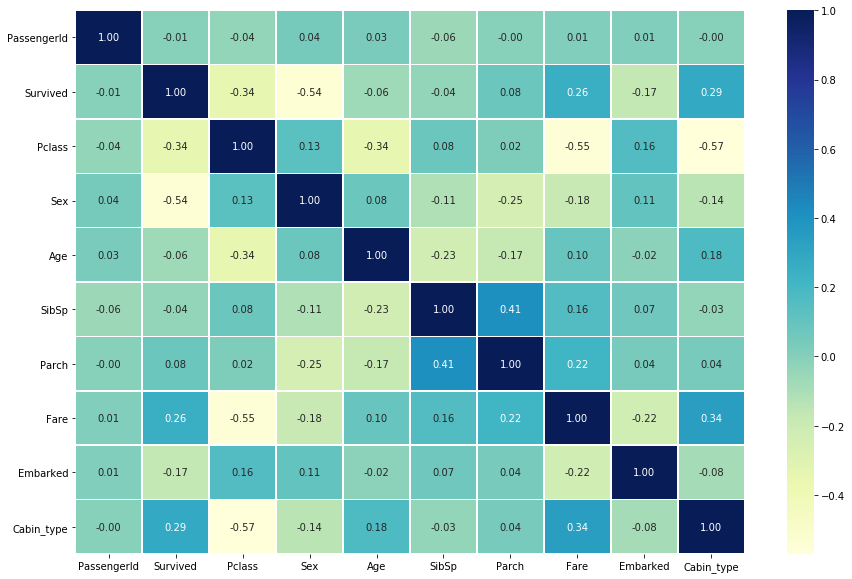

In [41]:
corr_matrix = df_train.corr()

fig, ax = plt.subplots(figsize =(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")

# 5. Modelling

In this problem, we have two data files, train.csv and test.csv. test.csv is used to predict the survival. hence, we split the train data into two, so that we can train and validate our model, which would make our model to perform better.

In [42]:
x = df_train.drop("Survived", axis = 1)
y = df_train["Survived"]
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type
0,1,3,1,22,1,0,7,2,0
1,2,1,0,38,1,0,71,0,3
2,3,3,0,26,0,0,7,2,0
3,4,1,0,35,1,0,53,2,3
4,5,3,1,35,0,0,8,2,0


In [43]:
# Split the data into train and test splits

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2)

In [44]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type
331,332,1,1,45,0,0,28,2,3
733,734,2,1,23,0,0,13,2,0
382,383,3,1,32,0,0,7,2,0
704,705,3,1,26,1,0,7,2,0
813,814,3,0,6,4,2,31,2,0
...,...,...,...,...,...,...,...,...,...
106,107,3,0,21,0,0,7,2,0
270,271,1,1,28,0,0,31,2,0
860,861,3,1,41,2,0,14,2,0
435,436,1,0,14,1,2,120,2,2


### Machine Learning Models going to be tried:

* Linear SVC
* Logistic Regression
* KNearest Neighbors
* Random Forest Classifier

In [45]:
models ={
    "Linear SVC": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter = 1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

def model_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and scores on different model
    '''
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores

In [46]:
scores = model_score(models = models,
            x_train = x_train,
            x_test = x_test,
            y_train = y_train,
            y_test = y_test)
scores

C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'Linear SVC': 0.6983240223463687,
 'Logistic Regression': 0.8156424581005587,
 'KNN': 0.664804469273743,
 'Random Forest Classifier': 0.8324022346368715}

### Model Comparison

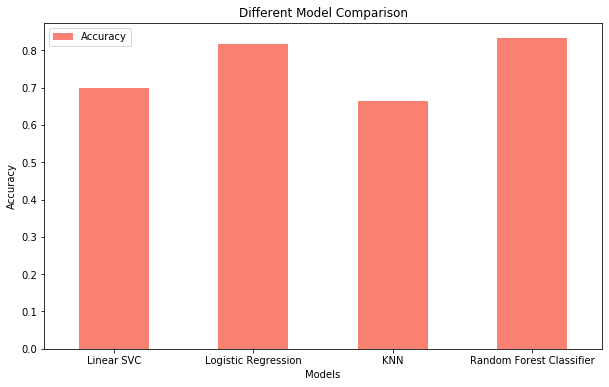

In [47]:
model_compare = pd.DataFrame(scores, index=["Accuracy"])
model_compare.T.plot(kind = "bar",
                     figsize = (10, 6),
                     color= ["salmon"])
plt.xticks(rotation = 0)
plt.title("Different Model Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy");

As KNN is the least performing model from the above models, we will drop KNN from further modelling. Hyperparameter tuning may be performed on Logistic Regression, Linear SVC and Random Forest Classifier

## Hyperparameter Tuning by RandomizedSearchCV

In [57]:
# Create hyperparameter grid for LinearSVC

svc_grid = {"C": np.logspace(-4,4,20),
            "max_iter": [1000, 5000, 10000]}

#Create hyperparameter grid for logistic Regression

log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"],
                "max_iter": [1000]}

# Create hyperparameter grid for Random Forest Classifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "n_jobs": [None, -1]}

np.random.seed(42)

# Perform hyperparameter tuning on SVC
rs_svc_grid = RandomizedSearchCV(LinearSVC(),
                                param_distributions=svc_grid,
                                n_iter = 20,
                                cv = 5,
                                verbose = True)

# Fit the model
rs_svc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)

C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\

C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ajmal\Desktop\Kaggle\Titanic-project\env\lib\site-packages\sklearn\svm\

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1000, 5000, 10000]},
              

In [62]:
rs_svc_grid.best_params_

{'max_iter': 10000, 'C': 0.012742749857031334}

In [63]:
rs_svc_grid.score(x_test, y_test)

0.7821229050279329

In [69]:
# Perform hyperparameter tuning on Logistic Regression

rs_log_reg_grid = RandomizedSearchCV(LogisticRegression(),
                                    param_distributions=log_reg_grid,
                                    cv = 5,
                                    n_iter = 20,
                                    verbose = True)

np.random.seed(42)

# Fit the model
rs_log_reg_grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [70]:
rs_log_reg_grid.best_params_

{'solver': 'liblinear', 'max_iter': 1000, 'C': 0.615848211066026}

In [71]:
rs_log_reg_grid.score(x_test, y_test)

0.8156424581005587

In [72]:
# Perform hyperparameter tuning on RandomForestClassifier

rs_rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions= rf_grid,
                                n_iter = 20,
                                cv= 5,
                                verbose = True)

np.random.seed(42)

# Fit the model
rs_rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [73]:
rs_rf_grid.best_params_

{'n_jobs': None,
 'n_estimators': 660,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

In [74]:
rs_rf_grid.score(x_test, y_test)

0.8212290502793296

### Hyperparamter Tuning on LogisticRegression() and RandomForestClassifier() using GridSearchCV 

In [75]:
# Hyperparameter tuning with GridSearchCV()

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit the model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [76]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'max_iter': 1000, 'solver': 'liblinear'}

In [77]:
gs_log_reg.score(x_test, y_test)

0.8156424581005587

In [79]:
# Hhyperparameter tuning on RandomForestClassifier() by GridSearchCV

gs_rf_grid ={"n_estimators": np.arange(500, 750, 50),
             "max_depth": [None, 3],
             "min_samples_split": np.arange(2,10,2),
             "min_samples_leaf": np.arange(1,10,2),
             "n_jobs": [None, -1]}

gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid= gs_rf_grid,
                     cv = 5,
                    verbose = True)

# Fit the model
gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed: 63.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [81]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500,
 'n_jobs': None}

In [82]:
gs_rf.score(x_test, y_test)

0.8268156424581006

In [83]:
# Finalising the ideal model

ideal_model = RandomForestClassifier(n_estimators = 500,
                                     max_depth = None,
                                     min_samples_leaf = 1,
                                     min_samples_split = 6,
                                     n_jobs = None)
ideal_model.fit(x_train, y_train)
ideal_model.score(x_test, y_test)

0.8324022346368715

# 6. Evaluation

* ROC Curve and AUC
* Confusion Matrix
* Precision
* F1
* Recall

In [84]:
# Make predictions with the ideal model

y_preds = ideal_model.predict(x_test)
y_preds

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

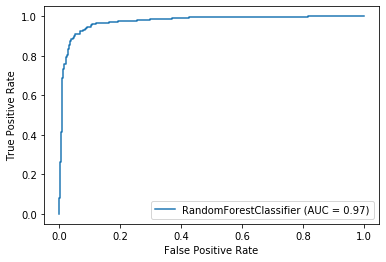

In [86]:
# ROC Curve
plot_roc_curve(ideal_model,
               x,
               y);

In [88]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[93, 12],
       [18, 56]], dtype=int64)

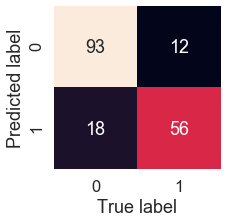

In [93]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(conf_mat,
                 annot = True,
                 cbar = False)
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [96]:
cv_acc = cross_val_score(ideal_model,
                         x,
                         y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8036971941497709

In [97]:
cv_precision = cross_val_score(ideal_model,
                         x,
                         y,
                         cv = 5,
                         scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.7934096865977069

In [98]:
cv_recall = cross_val_score(ideal_model,
                         x,
                         y,
                         cv = 5,
                         scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.6465899403239557

In [100]:
cv_f1 = cross_val_score(ideal_model,
                         x,
                         y,
                         cv = 5,
                         scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.7094870880155705

In [101]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "f1": cv_f1},
                          index = [0])
cv_metrics

,Accuracy,Precision,Recall,f1
0,0.803697,0.79341,0.64659,0.709487


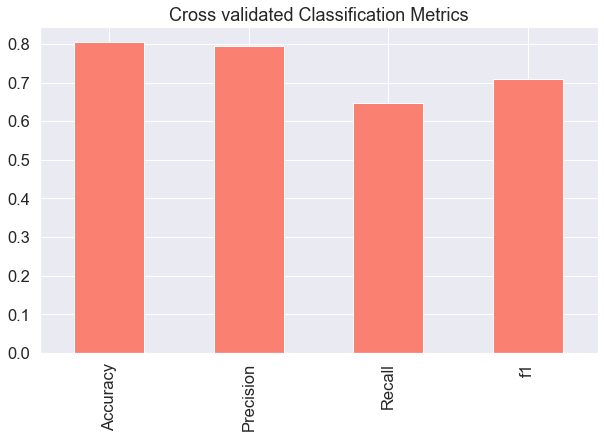

In [106]:
cv_metrics.T.plot(kind = "bar",
                  figsize =(10, 6),
                  color = ["salmon"],
                  legend = False)
plt.title("Cross validated Classification Metrics");

# Make Predictions on Test Data

In [107]:
# Load test data

df_test = pd.read_csv("C:data/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [109]:
df_test.drop(["Name", "Ticket"], axis = 1, inplace = True)

In [110]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [111]:
cabin_type(df_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type
0,892,3,male,34.5,0,0,7.8292,Q,NaN
1,893,3,female,47.0,1,0,7.0000,S,NaN
2,894,2,male,62.0,0,0,9.6875,Q,NaN
3,895,3,male,27.0,0,0,8.6625,S,NaN
4,896,3,female,22.0,1,1,12.2875,S,NaN
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,NaN
414,1306,1,female,39.0,0,0,108.9000,C,C
415,1307,3,male,38.5,0,0,7.2500,S,NaN
416,1308,3,male,NaN,0,0,8.0500,S,NaN


In [112]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Embarked         0
Cabin_type     327
dtype: int64

In [113]:
df_test["Fare"].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [115]:
df_test["Age"].fillna(df_test["Age"].mean(), inplace = True)
df_test["Fare"].fillna(7.7500, inplace = True)
df_test["Cabin_type"].fillna("missing", inplace = True)

In [116]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Cabin_type     0
dtype: int64

In [117]:
df_test["Age"] =df_test["Age"].astype(int)
df_test["Fare"] = df_test["Fare"].astype(int)

In [118]:
num_conv(df_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_type
0,892,3,1,34,0,0,7,1,0
1,893,3,0,47,1,0,7,2,0
2,894,2,1,62,0,0,9,1,0
3,895,3,1,27,0,0,8,2,0
4,896,3,0,22,1,1,12,2,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30,0,0,8,2,0
414,1306,1,0,39,0,0,108,0,3
415,1307,3,1,38,0,0,7,2,0
416,1308,3,1,30,0,0,8,2,0


In [119]:
x.shape, df_test.shape

((891, 9), (418, 9))

In [120]:
# Make predictions on test data

test_preds = ideal_model.predict(df_test)

In [121]:
df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_test["PassengerId"]
df_preds["Survived"] = test_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [122]:
df_preds["Survived"].value_counts()

0    284
1    134
Name: Survived, dtype: int64

In [123]:
# Export to csv

df_preds.to_csv("C:data\submission_1.csv", index = False)